<a href="https://colab.research.google.com/github/Anjalisheoran1142/Hotel-bookings-analysis/blob/main/Anjali_Hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Project Name**  - EDA ON HOTEL BOOKING DATASET






##### **Project Type**   - EDA
##### **Contribution**   - Individual
##### **Name**           - Anjali


# **Project Summary -**

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces,weather the booking was successfull or canceled , was there any deposit made at the time of reservation or not, which type of customer made the booking , was the booking made by agent or not , time is also recorded by the hotels like which month did they check in , what was the week number of the check in among other things. All personally identifying information has been removed from the data

The hotel industry is one of the most prominent industries in the world, and with the increase in competition, it has become increasingly important to analyze data to better understand customers and optimize revenue and improve customer satisfaction. The Hotel Booking Dataset EDA project aimed to provide insights into the trends and patterns within the hotel booking industry using a hotel booking dataset.

The dataset contained information on hotel bookings from two different hotels (City & Resort Hotels), including booking information, customer demographics, and hotel details etc for three years (2015, 2016 & 2017).

After loading the dataset, I started with data preparation and cleaning before I moved to EDA to analyse it. The dataset has around 119,390 records (rows) with 32 features (columns). Out of which, there were 31994 duplicate data, so deleted those rows. Remaining number of rows was 87396.Now 4 columns (company, agent, country & children) out of 32 had missing values. I imputed them in following manner:

Company: There may be some cases when customer didn't booked hotel via any company. Hence I will replace null values with0.
Agent: Similarly there can be bookings made without any agent, hence replaced them with 0.
Children: Children column is numeric and skewed, hence choose median for imputing missing values.
Country: country column is categorical column. We use mode of ‘country’ column, But it can lead to bias towards a specific country that occurs most frequently in the data. Hence I created a new category ‘others’ for missing values.
There were 166 rows with 0 adults, children and babies which seems unlikely hence dropped those rows. Then created new column for total_guest = (adults + children). Ignored babies because generally they are not charged. Some values in ‘adr’ were negative, which must be an error so imputed them with median since it was a skewed data. Created new column for total_stays_night = (weekend_nights + week_nights) to analyze average length of stay.Assigned appropriate data types for some columns.

After cleaning the dataset, various exploratory data analysis techniques were used to better understand the dataset. Three broad categories for EDA are: Univariate, Bivariate, Multivariate

I used different types of charts and metrics to visualize the relationships, trends, understand preferences etc. to better understand the data.
Overall, the Hotel Booking Dataset EDA project provided valuable insights into the hotel booking industry, including customer preferences, booking patterns, and trends over time. These insights can help hotels optimize revenue and improve customer satisfaction by tailoring their services to meet customer needs and expectations.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Hotels in the hospitality industry lack an effective and comprehensive analysis system for hotel bookings. This hinders their ability to optimize revenue, make data-driven decisions, and enhance operational efficiency. The industry requires a robust booking analysis system that can provide insights into booking patterns, customer segments, cancellation rates, and customer satisfaction levels.

Hence, there is a pressing need to develop an advanced hotel booking analysis system that can address these challenges and empower hotels to optimize their booking strategies, revenue management, operational efficiency, and overall customer experience. Such a system should leverage data mining, machine learning, and predictive modeling techniques to provide comprehensive insights and actionable recommendations for hotels in the dynamic and competitive hospitality industry..

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [116]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [117]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Hotel_Bookings.csv')

### Dataset First View

In [119]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03



### Dataset Rows & Columns count

In [120]:
# Dataset Rows & Columns count
df.shape

(119390, 32)


### Dataset Information

In [121]:

# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [122]:
# Dataset Duplicate Value Count
df.duplicated().sum()

31994

#### Missing Values/Null Values

In [123]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


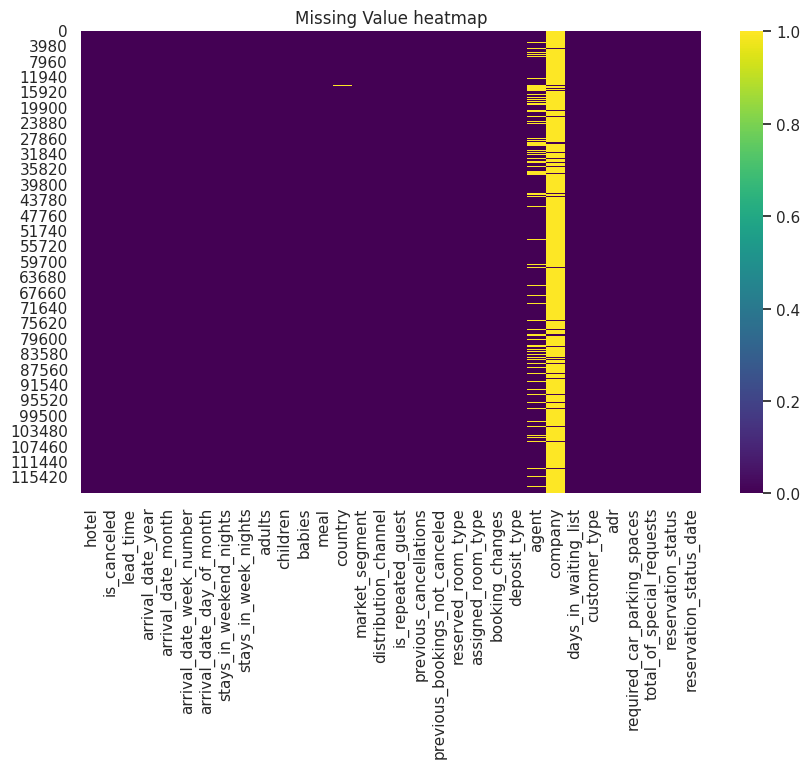

In [124]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Missing Value heatmap')
plt.show()

### What did you know about your dataset?








This Dataset is from hospitality industry which provides insights of hotel booking system and helps hotels make informed decisions to optimize revenue, improve customer experience, and enhance operational efficiency

It has 119390 rows and 32 columns

There is 129425 null values and 31994 Duplicate values in it and there are also some missing values in children, country, agent and company columns, we remove this later. In this dataset we find data types of every columns i.e (Int, float ,string) and observe that some columns data types is not accurate and remove later.

## ***2. Understanding Your Variables***

In [125]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [126]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [127]:



# Dataset Describe
df.describe(include=['O']).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


### Variables Description

*    **hotel** : Name of the hotel (Resort Hotel or City Hotel)

*   **is_canceled** : If the booking was canceled (1) or not (0)

*   **lead_time**: Number of days before the actual arrival of the guests

*   **arrival_date_year** : Year of arrival date

*   **arrival_date_month** : Month of month arrival date

*   **arrival_date_week_number** : Week number of year for arrival date

*   **arrival_date_day_of_month** : Day of arrival date

*   **stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

*   **stays_in_week_nights** : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

*   **adults** : Number of adults among guests

*   **arrival_date_year** : Year of arrival date

*   **arrival_date_month** : Month of month arrival date


*   **arrival_date_week_number** : Week number of year for arrival date


*  **arrival_date_day_of_month** : Day of arrival date


*  **stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.


*   **stays_in_week_nights** : Number of weeknights (Monday to Friday) spent at the hotel by the guests.


*   **adults** : Number of adults among guests


*   **children** : Number of children among guests


*   **babies** : Number of babies among guests


*   **meal** : Type of meal booked


*   **country** : Country of guests


*   **market_segment** : Designation of market segment

*   **distribution_channel** : Name of booking distribution channel


*   **is_repeated_guest** : If the booking was from a repeated guest (1) or not (0)


*   **previous_cancellations** : was there a cancelllation before

*   **previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

*   **reserved_room_type** : Code of room type reserved

*   **assigned_room_type** : Code of room type assigned

*   **booking_changes** : Number of changes/amendments made to the booking

*   **deposit_type** : Type of the deposit made by the guest

*   **agent** : ID of travel agent who made the booking

*   **company** : ID of the company that made the booking

*   **days_in_waiting_list** : Number of days the booking was in the waiting list
*   **customer_type** : Type of customer, assuming one of four categories


*   **adr** : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights


*   **required_car_parking_spaces** : Number of car parking spaces required by the customer


*  **total_of_special_requests** : Number of special requests made by the customer


*   **reservation_status** : Reservation status (Canceled, Check-Out or No-Show)


*   **reservation_status_date** : Date at which the last reservation status was updated

### Check Unique Values for each variable.

In [128]:
# Check Unique Values for each variable.
df.nunique()

,0
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14



### Data Wrangling Code





In [129]:
# Write your code to make your dataset analysis ready.

In [130]:
# checking null values percentage of each column
round((df.isnull().sum()/df.shape[0])*100)


,0
hotel,0.0
is_canceled,0.0
lead_time,0.0
arrival_date_year,0.0
arrival_date_month,0.0
arrival_date_week_number,0.0
arrival_date_day_of_month,0.0
stays_in_weekend_nights,0.0
stays_in_week_nights,0.0
adults,0.0


In [131]:
# we will be removing company column here because it has 94% of null values

df.drop('company', inplace= True , axis=1)

In [132]:
# combining children and babies column in one column as total_children and droping old columns
df['Total_children']=df['children']+df['babies']
df.drop(['children','babies'],inplace=True,axis=1)

In [133]:
# Combining children and adults into one column

df["total_guest"] = df["Total_children"] + df["adults"]

In [134]:
# making a date column by combining 3 columns arrival_date_year , arrival_date_month and arrival_date_day_of_month

df["date"]=df["arrival_date_year"].astype(str)+"/"+df["arrival_date_month"]+"/"+df["arrival_date_day_of_month"].astype(str)

In [135]:
# converting newly made date column to date time column and then verfying the correction
df['date']=pd.to_datetime(df['date'])
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [136]:

# Adding 'stays_in_weekend_nights' & 'stays_in_week_nights' column to get total_stay duration
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


In [137]:
# We have created a col for revenue using total stay * adr
df['revenue'] = df['total_stay'] * df['adr']


In [138]:
# Dropping the old columns as everything can be accessed using this new column

df.drop(["arrival_date_day_of_month","arrival_date_year","arrival_date_month"], inplace= True , axis=1)

In [139]:
df.head()            # verifying new columns by observing them

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_children,total_guest,date,total_stay,revenue
0,Resort Hotel,0,342,27,0,0,2,BB,PRT,Direct,...,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01,0,0.0
1,Resort Hotel,0,737,27,0,0,2,BB,PRT,Direct,...,0.0,0,0,Check-Out,2015-07-01,0.0,2.0,2015-07-01,0,0.0
2,Resort Hotel,0,7,27,0,1,1,BB,GBR,Direct,...,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01,1,75.0
3,Resort Hotel,0,13,27,0,1,1,BB,GBR,Corporate,...,75.0,0,0,Check-Out,2015-07-02,0.0,1.0,2015-07-01,1,75.0
4,Resort Hotel,0,14,27,0,2,2,BB,GBR,Online TA,...,98.0,0,1,Check-Out,2015-07-03,0.0,2.0,2015-07-01,2,196.0


In [140]:
df.columns           # displaying data with added new columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Total_children',
       'total_guest', 'date', 'total_stay', 'revenue'],
      dtype='object')


## **Canceled bookings and Repeated guests**

In [141]:
repeat=df.groupby ("hotel")["is_repeated_guest"].value_counts(normalize=True).unstack()
repeat


is_repeated_guest,0,1
hotel,,
City Hotel,0.974385,0.025615
Resort Hotel,0.955617,0.044383


In [142]:
cancel=df.groupby (["hotel"] )["is_canceled"].value_counts(normalize=True).unstack()

print(cancel)

is_canceled          0         1
hotel                           
City Hotel    0.582730  0.417270
Resort Hotel  0.722366  0.277634


In [143]:
print(repeat)
print("-"*100)
print("*"*50)
print("-"*100)
print(cancel)

is_repeated_guest         0         1
hotel                                
City Hotel         0.974385  0.025615
Resort Hotel       0.955617  0.044383
----------------------------------------------------------------------------------------------------
**************************************************
----------------------------------------------------------------------------------------------------
is_canceled          0         1
hotel                           
City Hotel    0.582730  0.417270
Resort Hotel  0.722366  0.277634


*   Repeated guests in City Hotel is around 2.5 %
*   Canceled bookings in City hotel is around 41 %



---


*   Repeated guests in Resort Hotel is around 4.4 %
*   Canceled bookings in Resort hotel is around 27 %



















## **Cancellations Based on Distribution**

In [144]:
total_bookings=df.groupby("distribution_channel")["booking_changes"].count()
total_bookings

,booking_changes
distribution_channel,
Corporate,6677
Direct,14645
GDS,193
TA/TO,97870
Undefined,5




*  Most number of bookings is done by TA/TO followed by Direct and then Corporate




In [145]:
bookings_cancel=df[df["is_canceled"]!=0].groupby("distribution_channel")["is_canceled"].count()
bookings_cancel

,is_canceled
distribution_channel,
Corporate,1474
Direct,2557
GDS,37
TA/TO,40152
Undefined,4




*   Most number of Booking cancellation is done by TA/TO followed by Direct and then Corporate




In [146]:
((bookings_cancel / total_bookings)*100)[0:4]

,0
distribution_channel,
Corporate,22.075783
Direct,17.459884
GDS,19.170984
TA/TO,41.025851


*   41.9% of bookings given by Travel agents/ Tour Operator are getting cancelled



---








## Booking changes

In [147]:
total_bookings

,booking_changes
distribution_channel,
Corporate,6677
Direct,14645
GDS,193
TA/TO,97870
Undefined,5


*  Most number of bookings are done by TA/TO followed by Direct and then Corporate




In [148]:
booking_changes=df[df["booking_changes"]!=0].groupby("distribution_channel")["booking_changes"].sum()
booking_changes

,booking_changes
distribution_channel,
Corporate,2431
Direct,5833
GDS,18
TA/TO,18118




*   Most number of bookings changes are done by TA/TO followed by Direct and then Corporate




In [149]:
(booking_changes / total_bookings ) * 100

,booking_changes
distribution_channel,
Corporate,36.408567
Direct,39.829293
GDS,9.326425
TA/TO,18.512312
Undefined,NaN




*   36.4% of Corporate customers are making changes in their bookings
*   39.8% of Direct customers are making changes in their bookings

# ---------------------------------------------------------------------------------------------------------------------------------------------------------



# Arrival Date Month

In [150]:
print("City Hotel monthwise bookings")
print(50*"*")
df[df["hotel"]=="City Hotel"]["date"].dt.month_name().value_counts()

City Hotel monthwise bookings
**************************************************


,count
date,
August,8983
May,8232
July,8088
June,7894
October,7605
April,7480
September,7400
March,6458
February,4965


In [151]:
print("Resort Hotel monthwise bookings")
print(50*"*")
df[df["hotel"]=="Resort Hotel"]["date"].dt.month_name().value_counts()

Resort Hotel monthwise bookings
**************************************************


,count
date,
August,4894
July,4573
April,3609
May,3559
October,3555
March,3336
September,3108
February,3103
June,3045




*   Using the above data we can derive that peak season for City Hotel is from September-to- August
*   Using the above data we can derive that peak season for Resort Hotel are July and August


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


##Country

In [152]:
df.value_counts("country", normalize=True).iloc[0:3]

,proportion
country,
PRT,0.408656
GBR,0.102008
FRA,0.087593



*  Most number of bookings is coming from PORTUGAL40% and Great Britain 11%


In [153]:
df.value_counts('agent',normalize=True).iloc[0:3]

,proportion
agent,
9.0,0.310150
240.0,0.135099
1.0,0.069782





* Highest number of bookings (31%) is done by agent with ID number 9.0




In [154]:
df[df["hotel"]=="City Hotel"]["agent"].value_counts(normalize=True).iloc[0:3]

,proportion
agent,
9.0,0.448812
1.0,0.100240
14.0,0.051124





*   Highest number of bookings 44% is done by agent with ID number 9.0 in City Hotel




In [155]:
df[df["hotel"]=="Resort Hotel"]["agent"].value_counts(normalize=True).iloc[0:3]

,proportion
agent,
240.0,0.436564
250.0,0.090076
241.0,0.054033


*  
Highest number of bookings (43.6%) is done by agent with ID number 240 in Resort Hotel

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## Deposite type

In [156]:
df.groupby(["deposit_type"])["is_canceled"].sum()

,is_canceled
deposit_type,
No Deposit,29694
Non Refund,14494
Refundable,36




*   Highest number of cancellations is done when NO DEPOSIT is made at the time of reservation




# What all manipulations have you done and insights you found?





*   Fisrt we create a copy of our dataset to keep our dataset as at is.
*   Check duplicates rows, found that 31994 rows are duplicate, so we removed these values using drop.duplicated() function.


*  Check which column has null values, and found that company is 94%, agent 14%, country 0.51% and children 0.004 % null values are present.
*  Plotting a Heatmap to visualize the missing values in columns
*   Almost 94% value is missing in company column, so it is better to drop the column company
* Canceled bookings and Repeated guests ----->
   1. Repeated guests in City Hotel is around 2.5 %
   2. Canceled bookings in City hotel is around 41 %
   3. Repeated guests in Resort Hotel is around 4.4 %
   4. Canceled bookings in Resort hotel is around 27 %

* Most number of bookings is done by TA/TO followed by Direct and then Corporate
* Most number of Booking cancellation is done by TA/TO followed by Direct and then Corporate
* 41.9% of bookings given by Travel agents/ Tour Operator are getting cancelled
* Most number of bookings are done by TA/TO followed by Direct and then Corporate
* Booking changes----->
   1.    36.4% of Corporate customers are making changes in their bookings
   2.    39.8% of Direct customers are making changes in their bookings

* Arrival Date Month----->
   1. Using the above data we can derive that peak season for City Hotel is from September -to- August
   2. Using the above data we can derive that peak season for Resort Hotel are July and August
* Most number of bookings is coming from PORTUGAL 40% and Great Britain 11%
* agent----->
   1. Highest number of bookings 44% is done by agent with ID number 9.0 in City Hotel
   2. Highest number of bookings 43.5% is done by agent with ID number 240 in Resort Hotel

* Highest number of cancellations is done when NO DEPOSIT is made at the time of reservation













## Data Manipulation


* Combine children and baby column into 1 column as total_children and then drop old columns

* Combine children and adults into one column as Total_persons

* make a date column by combining 3 columns arrival_date_year , arrival_date_month and arrival_date_day_of_month as date
* converting newly made date column to datetime column and then verifying the correction



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

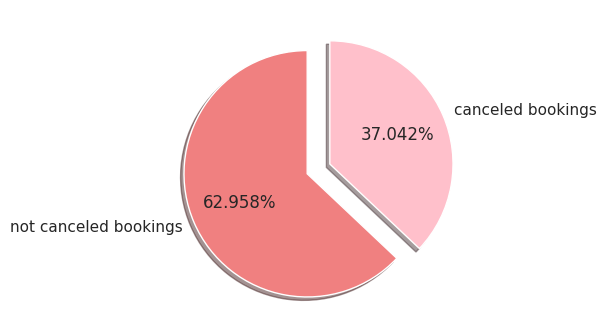

In [157]:
# Chart - 1 visualization code
plt.figure(figsize=(4,4))
plt.pie(df['is_canceled'].value_counts(),shadow=True,autopct='%1.3f%%',labels=('not canceled bookings','canceled bookings'),explode=(0.2,0),startangle=90,colors
        =['lightcoral','pink'])
plt.show()

##### 1. Why did you pick the specific chart?


Answer-> In pie chart it is easy to explain the comparison between two or more variables using the percentage terms through area covered in a circle with different colors. So, I used Pie chart and which helped me to get the percentage comparision between canceled and Not canceled bookings.

##### 2. What is/are the insight(s) found from the chart?

Answer -> From the above pie chart we can clearly see that the percentage of
- Not canceled bookings is 72.5%
- Canceled bookings is 27.5%  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer -> Using the data we can clearly say that the average cancellation percentage of these hotels is much higher than the industry average cancelltaion rate. So, if this cancellation rate continues or increases in the future this will lead to major problems for the hotels

#### Chart - 2

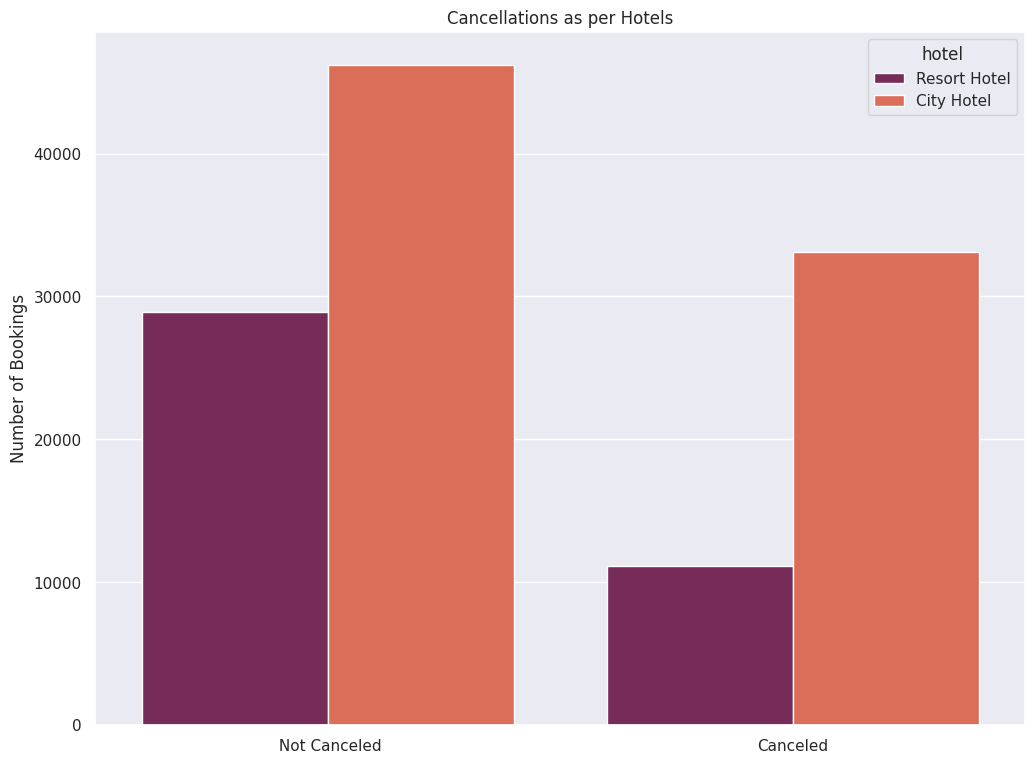

is_canceled          0         1
hotel                           
City Hotel    0.582730  0.417270
Resort Hotel  0.722366  0.277634


In [158]:
# Chart - 2 visualization code
sns.countplot(x=df["is_canceled"],hue=df["hotel"],palette="rocket")
plt.title("Cancellations as per Hotels")
plt.xticks(ticks=[0,1],labels=[" Not Canceled","Canceled"])
plt.xlabel("")
plt.ylabel("Number of Bookings")
plt.show()

print(cancel)


##### 1. Why did you pick the specific chart?

Answer) The count plot is used to represent the occurance(counts) of the observation present in the catogorical data. So, i decided to use this plot so as to visualize the canceled bookings and not canceled booking on both city hotels and resort.

##### 2. What is/are the insight(s) found from the chart?

Answer
- Percentage of canceled booking in Resort hotel is 23.48%
- Percentage of canceled booking in City hotel is 30%

We can clearly see that no of canceled bookings in the City hotel is much higher when compared to Resort hotel. Average cancellation rate of both hotels combined is 27.5% whereas cancellation rate of City hotel is 30% which is higher than average percentage but in resort hotel cancellation percentage is 23.48% which is less than average percentage

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer )
  We can see that cancellation rate of city hotels is higher then the average cancellation rate of both combined which is major problematic factor for them . So they need to resevise their cancellation policies so as to get more positive impact on their hotels

#### Chart - 3

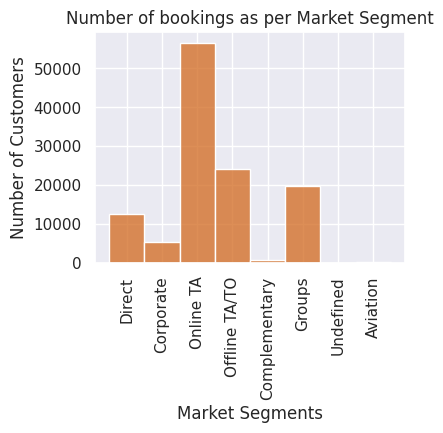

In [159]:
# Chart - 3 visualization code
plt.figure(figsize=(4,3))
sns.histplot(data=df,x="market_segment",color="chocolate")
plt.xticks(rotation="vertical")
plt.title("Number of bookings as per Market Segment")
plt.ylabel("Number of Customers")
plt.xlabel("Market Segments")
plt.show()

##### 1. Why did you pick the specific chart?

Answer) A histogram is a graph that shows the frequency of numerical data using rectangle which are joined together. The height of a rectangle (the vertical axis) represents the distribution frequency of a variable. I wanted to know how many bookings are made through various market segments

##### 2. What is/are the insight(s) found from the chart?

Answer we can clearly see that from above histogram most number of bookings is coming from
- (**1**) Online TA
- (**2**) Offline TA/TO

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Hotels need to focus more on other market segments such as Direct Corporate Complementary Groups and AViation by providing offers so that the bookings by these market segments gets increased.

#### Chart - 4

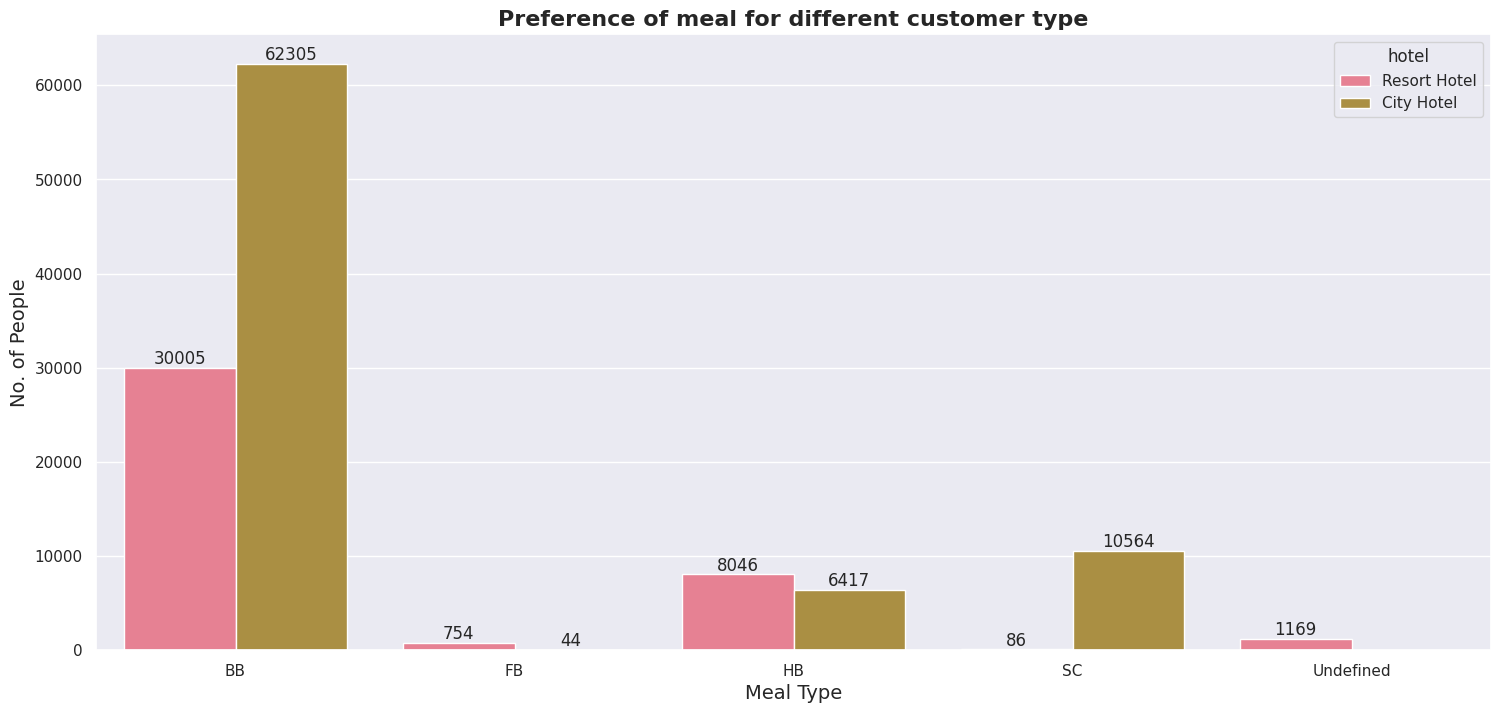

In [160]:
sns.set(rc={'figure.figsize':(18,8)})
sns.set_palette('husl')
graph = sns.countplot(x='meal',hue='hotel',data=df)
graph.set_title('Preference of meal for different customer type',fontsize = 16, fontweight='bold')
graph.set_xlabel('Meal Type',fontsize = 14)
graph.set_ylabel('No. of People',fontsize = 14)
for bar in graph.containers:
   graph.bar_label(bar)
plt.show()

##### 1. Why did you pick the specific chart?

Answer) As it is Univariate analysis, which is to identify from one variable or one column. we have choosen bar graph.

##### 2. What is/are the insight(s) found from the chart?

Answer Bread & Breakfast (BB) is the most preferred meal by the customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer As most customers prefer Bread & Breakfast (BB), the hotel management can introduce offers on Full Board (FB) meal, which can increase revenue as well.

#### Chart - 5

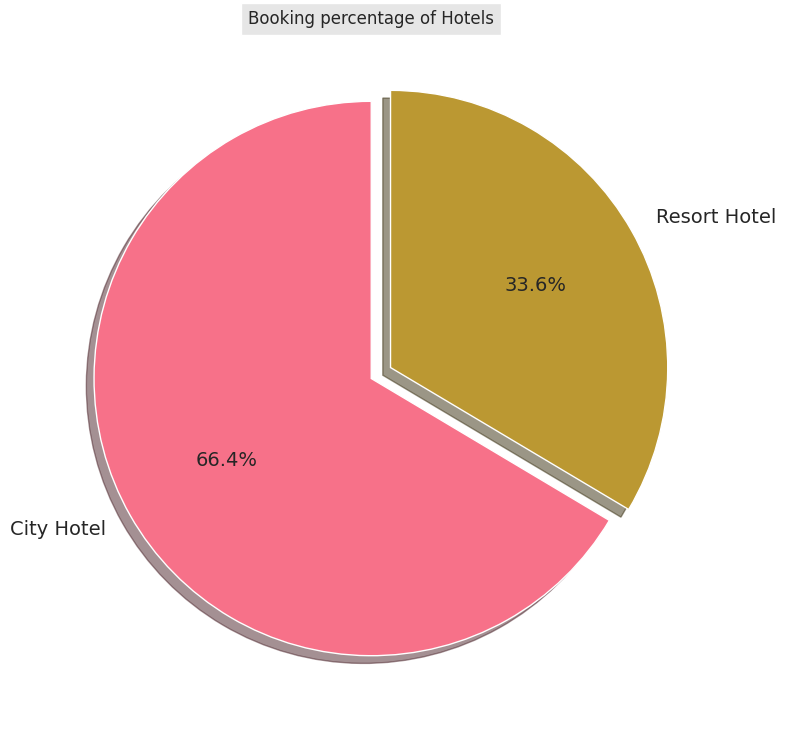

In [161]:
# Chart - 5 visualization code
# Univariate Analysis

plt.rcParams['figure.figsize'] = 12,9
labels = df['hotel'].value_counts().index.tolist()      # Create labels -> ['City Hotel', 'Resort Hotel']
x = df['hotel'].value_counts().tolist()              # counts of each hotel -> [53428, 33968]
plt.title('Booking percentage of Hotels',bbox={'facecolor':'0.9', 'pad': 5})
plt.pie(x, explode=(0, 0.08), labels=labels,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14},shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer) As this is a Univariate Analysis, we compare the data from one variable or one column 'hotel', so we have considered pie chart

##### 2. What is/are the insight(s) found from the chart?

Answer) We found that the booking number is Higher in City Hotel which is 61.1% than Resort Hotel which is 38.9%. Hence we can say that City hotel has more consumption.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer)
* City Hotel :- Provided more services to attract more guest to increase more revenue.

* Resort Hotel :- Find solution to attract guest and find what city hotel did to attract guest.

#### Chart - 6

<ipython-input-162-55b79aeeb676>:4: FutureWarning: The provided callable <function mean at 0x792f16b97d00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  d3 = grouped_by_hotel['revenue'].agg(np.mean).reset_index().rename(columns = {'revenue':'average_revenue'})  # calculating average revenue hotel wise


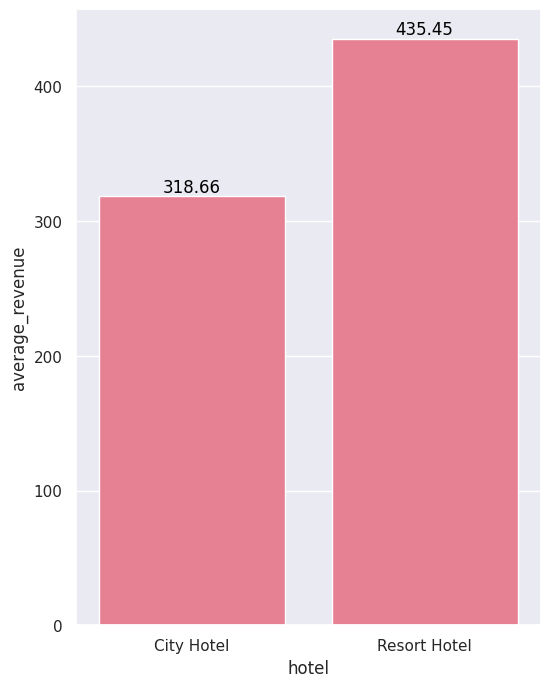

In [162]:
# Chart - 6 visualization code
# Bivariate Analysis
grouped_by_hotel = df.groupby('hotel')   # did groupby on hotel
d3 = grouped_by_hotel['revenue'].agg(np.mean).reset_index().rename(columns = {'revenue':'average_revenue'})  # calculating average revenue hotel wise
plt.figure(figsize=(6,8))
ax=sns.barplot(x=d3['hotel'],y=d3['average_revenue'])

# Annotating each bar with the corresponding value
for index, row in d3.iterrows():
    ax.text(row.name, row['average_revenue'], round(row['average_revenue'], 2), color='black', ha="center", va="bottom")
plt.show()


##### 1. Why did you pick the specific chart?

Answer As we are analysing hotel and adr variables, to know which hotel is making more revenue, we have choosed bar graph.

##### 2. What is/are the insight(s) found from the chart?

Answer City Hotel is making more revenue than the Resort Hotel, which can be depicted as the City Hotel has significantly more bookings than the Resort Hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer From the above bar graph, City Hotel is making more revenue than the Resort Hotel. The Resort Hotel management may consider to give complimentary meals and combo packages (adventure packages, tourism packages) to attract more customers and to increase hotel bookings, which increases revenue to the hotel.

#### Chart - 7

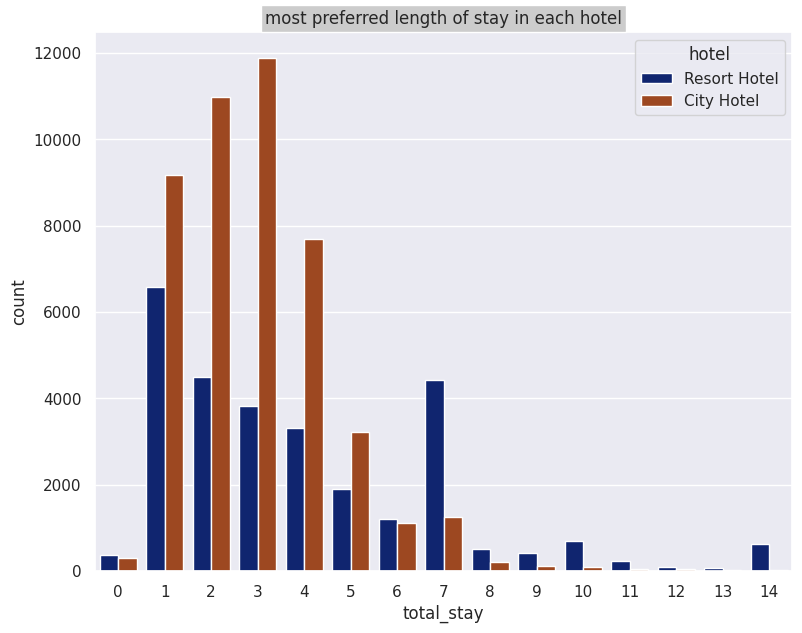

In [163]:
# Chart - 7 visualization code
# Bivariate Analysis
not_canceled = df[df['is_canceled'] == 0]     # it gives us non canceled booking
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (9,7))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'],palette='dark')
plt.title('most preferred length of stay in each hotel',bbox={'facecolor':'0.8', 'pad':3})
plt.show()

##### 1. Why did you pick the specific chart?

Answer As this analysis is a Bivariate Analysis, we considered bar graph in order to visualize the most preferred stay in each hotel respectively

##### 2. What is/are the insight(s) found from the chart?

Answer From the above bar graph, we can see that most preferred stay is 3 days. Most of the customers prefer City Hotel for shorter stay and Resort Hotel for longer stays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer As customers are preferring Resort Hotel for longer stay, hotel management can introduce free gift coupons, loyalty service, complimentary services and combo tourism packages for nearby places in order to make customers redundent, which will increase revenue as well.

#### Chart - 8

In [164]:


# Chart - 8 visualization code
dc = df.groupby('distribution_channel')
d1 = pd.DataFrame(round((dc.size() /  df.shape[0]) * 100,2)).reset_index().rename(columns = {0: 'Booking_%'})
d1

,distribution_channel,Booking_%
0,Corporate,5.59
1,Direct,12.27
2,GDS,0.16
3,TA/TO,81.98
4,Undefined,0.00


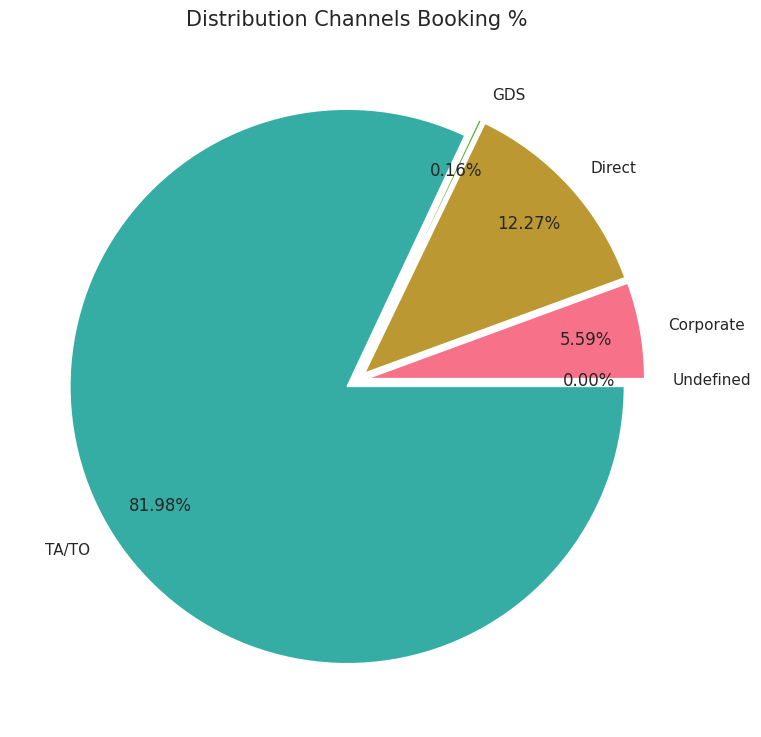

In [165]:
plt.figure(figsize = (9,9))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x = data, autopct = "%0.2f%%", explode=[0.04] * 5, labels = labels, pctdistance = 0.8)
plt.title("Distribution Channels Booking %", fontsize = 15);


##### 1. Why did you pick the specific chart?

Answer We are analysing the most preferred distribution channes for hotel bookings, which most of the customers used with the help of pie chart. As pie chart gives detailed information, we have choosen pie chart

##### 2. What is/are the insight(s) found from the chart?

Answer) 79% of the customers has choosen Travel Agent / Tour Operator (TA/TO) for hotel booking, followed by direct bookings and corporate are 15% and 6% respectivelyAnswer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answer The hotel management can offer discounts, complimentary services and offers on direct bookings as the hotel doesn’t pay commissions to third parties and maintains a direct relationship with the customer when a customer books the hotel directly




#### Chart - 9

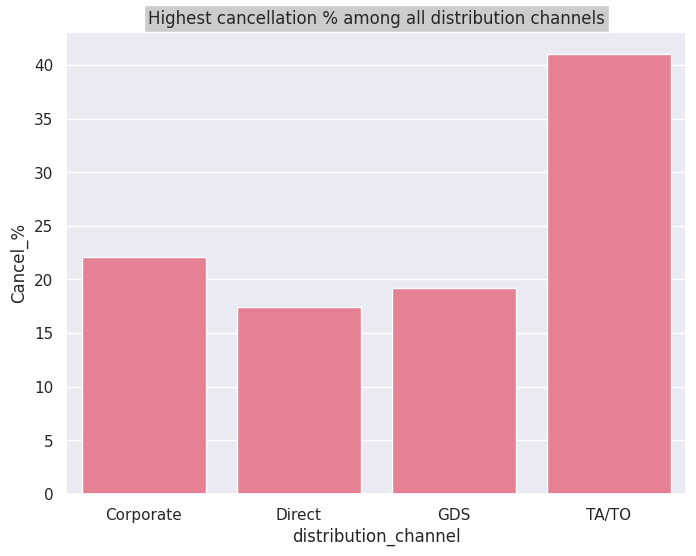

In [166]:
# Chart - 9 visualization code
#  Univariate Analysis
d1 = pd.DataFrame((dc['is_canceled'].sum() / dc.size()) * 100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
d1
plt.figure(figsize = (8,6))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.title('Highest cancellation % among all distribution channels',bbox={'facecolor':'0.8', 'pad':3})
plt.show()

##### 1. Why did you pick the specific chart?

Answer We have choosen bar graph as we are using single variable to understand which distribution channel has highest booking cancellation percentage.

##### 2. What is/are the insight(s) found from the chart?

Answer Travel Agent / Tour Operator (TA/TO) has the highest booking cancellation percentage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer As TA/TO has highest number of booking cancellations of around 30%, the hotel management may introduce offers for direct bookings in order to reduce cancellations and increase direct bookings.

#### Chart - 10

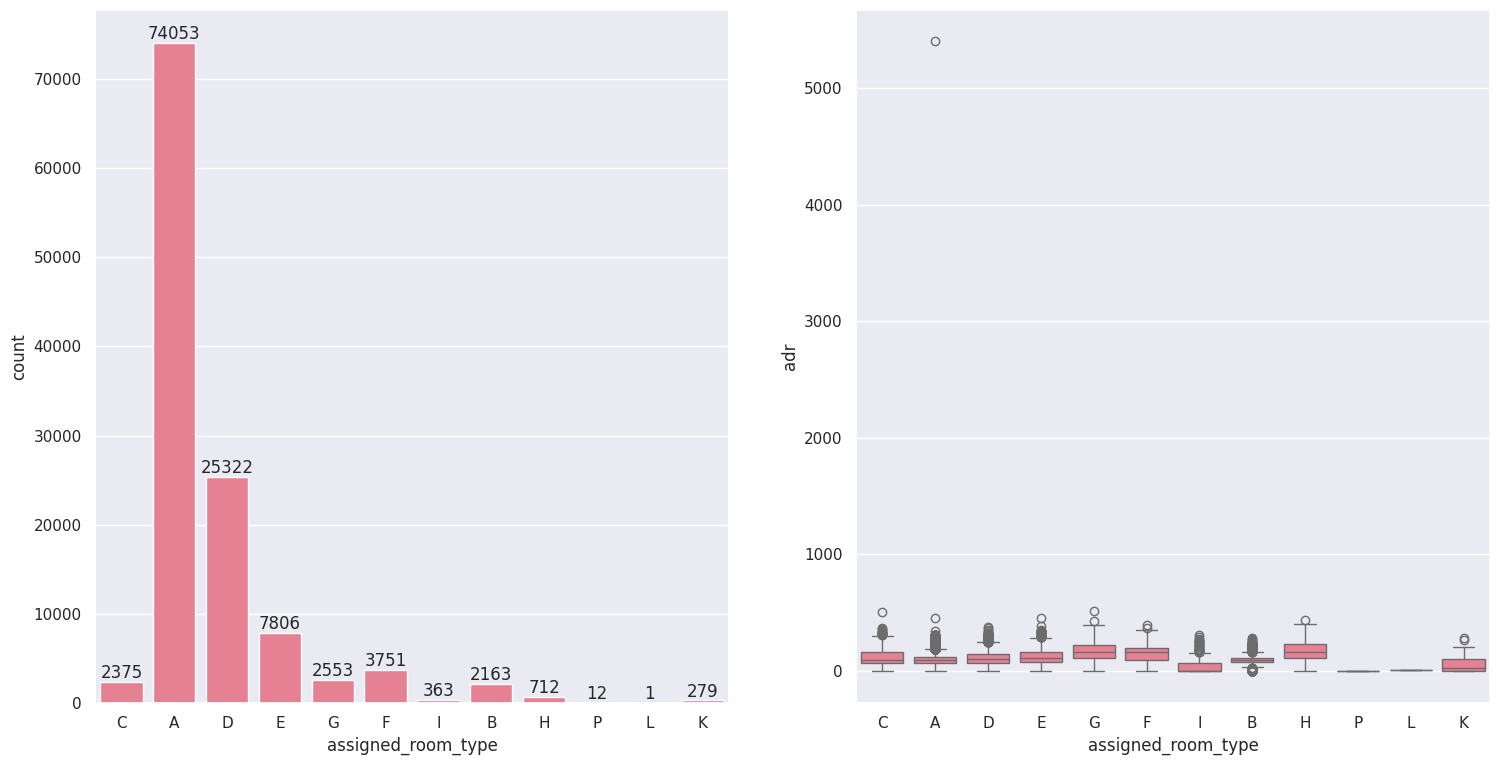

In [167]:

# Chart - 10 visualization code
# To identify which room type is in most demand and which room type generate the highest adr.
fig, axes = plt.subplots(1, 2, figsize = (18, 9))
room = df.groupby('assigned_room_type')
d1['Num_of_bookings'] = room.size()
plot = sns.countplot(ax = axes[0], x = df['assigned_room_type'])
for bar in plot.containers:
  plot.bar_label(bar)
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = df['adr'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer As we are performing Multivariate Analysis to identify which room type is in most demand and which room type generate the highest adr, we have choosed bar graph and boxplot to understand better.

##### 2. What is/are the insight(s) found from the chart?

Answer From the above graphs, we ca identofy that roomtype A is the most demanded rooms by the customer while booking, whereas room types H,G,C are generating more adr respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer
Hotel management sholud consider to increase room types A, H in order to ger more revenue and increase adr respectively.

#### Chart - 11

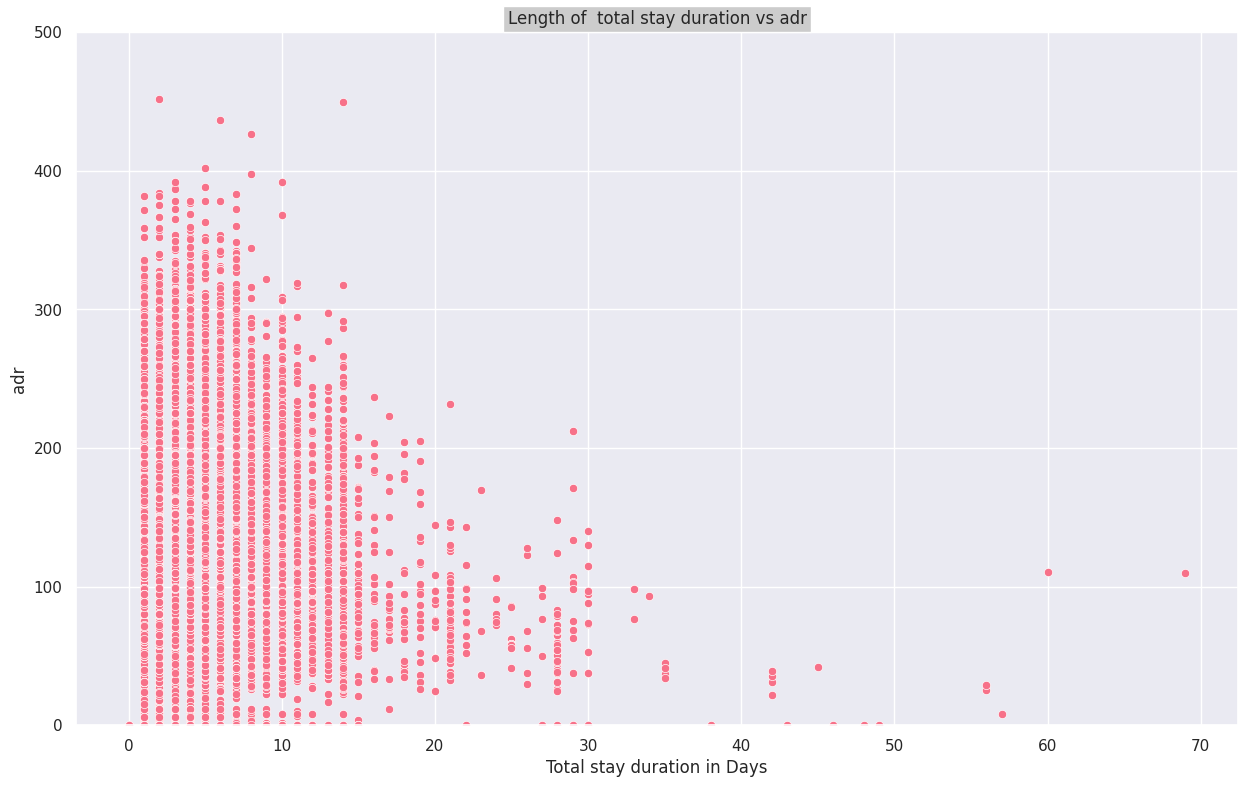

In [168]:
# Chart - 11 visualization code
# Length of stay vs adr
plt.figure(figsize = (15,9))
plt.ylim(0,500)
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.title('Length of  total stay duration vs adr',bbox={'facecolor':'0.8', 'pad':3})
plt.xlabel('Total stay duration in Days')
plt.show()


##### 1. Why did you pick the specific chart?

Answer To understand the effect of total stay on adr, we have choosed scatterplot. However, we notice that there is an outliner in adr, we will remove for better scatterplot.

##### 2. What is/are the insight(s) found from the chart?

Answer From the scatter plot, it is clearly visible that length of total_stay increases, adr decreases. Customers who stay for less than 10 days pay more price when compared with the customers who stay for 30 days or more. For longer stay, the better deal for customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer while the gained insights have the potential to create a positive business impact by optimizing pricing and inventory management, they also warn of possible pitfalls like underpricing or overly aggressive discounting, which could lead to negative growth if not carefully managed.

#### Chart - 12

<ipython-input-169-48e7072377cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bargraph = sns.barplot(x=top_10_country_by_guest.index, y=top_10_country_by_guest,palette='dark')


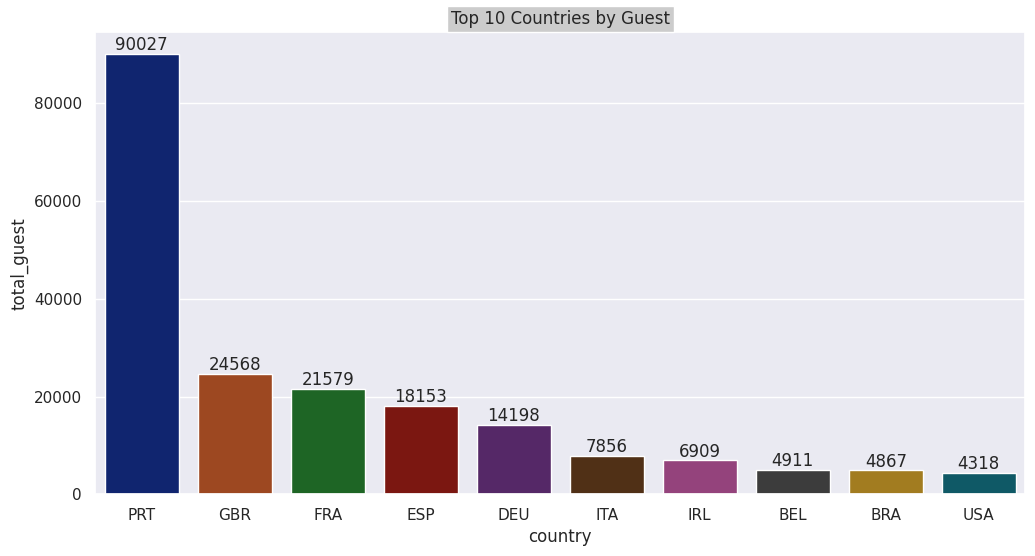

In [169]:
# Chart - 12 visualization code
# Chart - 10 visualization code
# top 10 country guest
guest_country_wise = pd.DataFrame(df[['country', 'total_guest']])
guest_country_wise_df = guest_country_wise.groupby(['country'])['total_guest'].sum()
guest_country_wise_df.sort_values(ascending = False, inplace = True)
top_10_country_by_guest = guest_country_wise_df.head(10)

plt.figure(figsize=(12,6))
bargraph = sns.barplot(x=top_10_country_by_guest.index, y=top_10_country_by_guest,palette='dark')
plt.title('Top 10 Countries by Guest',bbox={'facecolor':'0.8', 'pad':3})
for bar in bargraph.containers:
  bargraph.bar_label(bar)
plt.show()


##### 1. Why did you pick the specific chart?

Answer To know that which country guest is mostly coming, that why we choose bar plot.

##### 2. What is/are the insight(s) found from the chart?

Answer As we can see, that maximum guest is coming from Portugal

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer We can do more advertising & can provide attractive offers to Portugal guests to enhance the customer volume.


#### Chart - 13

<ipython-input-170-b2cd479add09>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'agent', y = 'num_of_bookings', data = df3,palette='rainbow', order = df3.sort_values('num_of_bookings', ascending = False).agent)


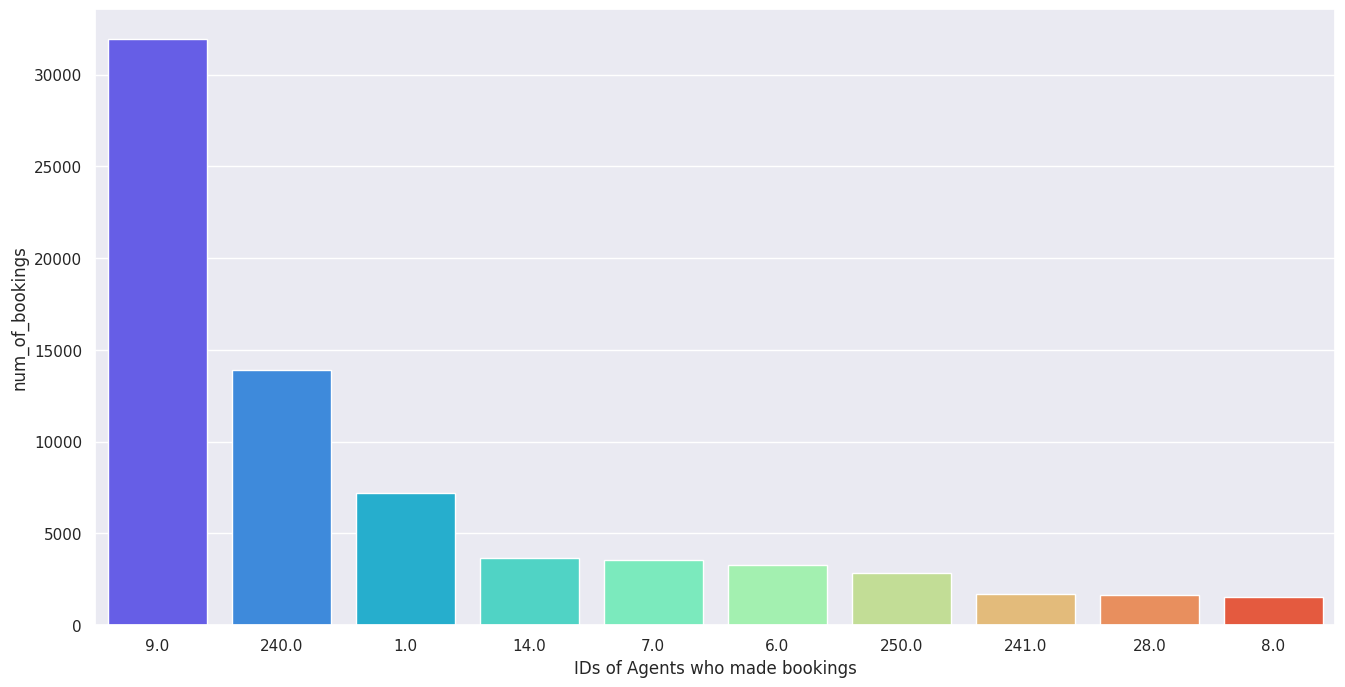

In [170]:
# Chart - 11 visualization code
# To know which agent have maximum no of booking



df3 = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns =
                                                                    {'count':'num_of_bookings'}

                                                                     ).sort_values(by = 'num_of_bookings', ascending = False)
df3
df3.drop(df3[df3['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
df3 = df3[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (16,8))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = df3,palette='rainbow', order = df3.sort_values('num_of_bookings', ascending = False).agent)
plt.xlabel('IDs of Agents who made bookings')
plt.show()


##### 1. Why did you pick the specific chart?


Answer To know which agent making most no. of bookings.

##### 2. What is/are the insight(s) found from the chart?

Answer Here we can clearly see that Agent no. 9 has made most no. of bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer The analysis of the top 10 performing agents in terms of bookings provides valuable insights for targeted incentive programs, resource allocation, and improved forecasting, contributing to a positive business impact. However, there are risks to consider, such as over-reliance on a few agents or neglecting lower performers, which could hinder growth if not addressed. Balancing strategies to support both top and lower-performing agents ensures sustainable growth and minimizes potential negative outcomes.

#### Chart - 14 - Correlation Heatmap

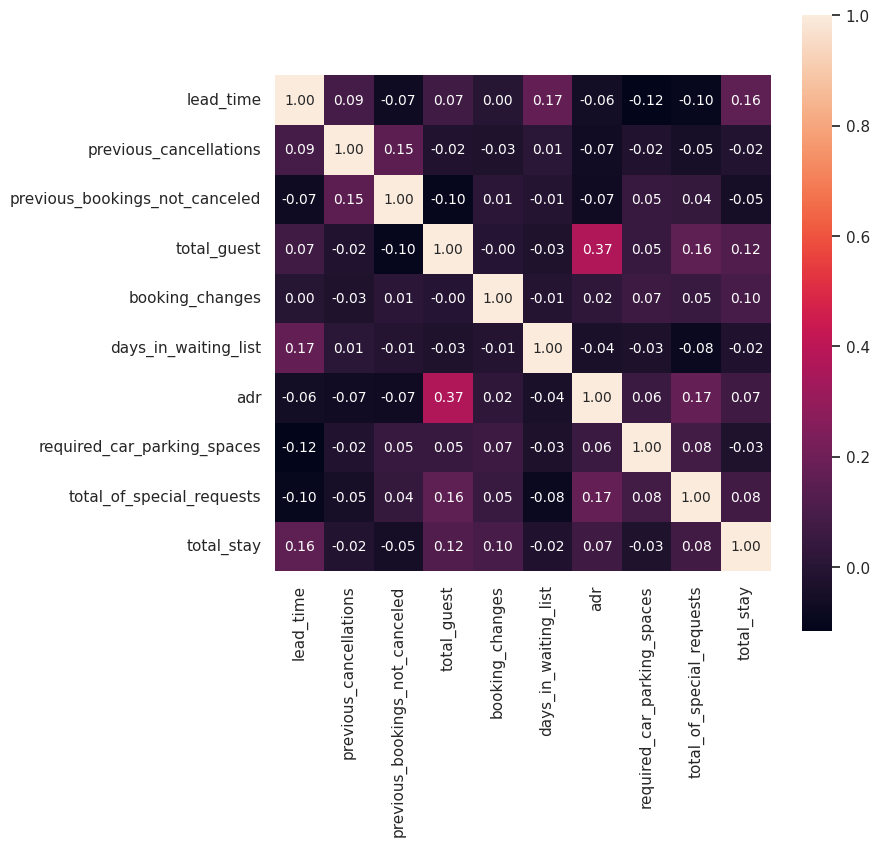

In [171]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
corr_df = df[['lead_time','previous_cancellations', 'previous_bookings_not_canceled', 'total_guest',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests','total_stay']].corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_df, annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer To understand the correlation between the variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Total stay and the lead time have positive correlation. This may be interpreted that for longer hotel stays, usually people plan in advance.

ADR is positively correlated with total_guest, which defines that as more number of people increases more revenue

#### Chart - 15 - Pair Plot

<Figure size 1200x800 with 0 Axes>

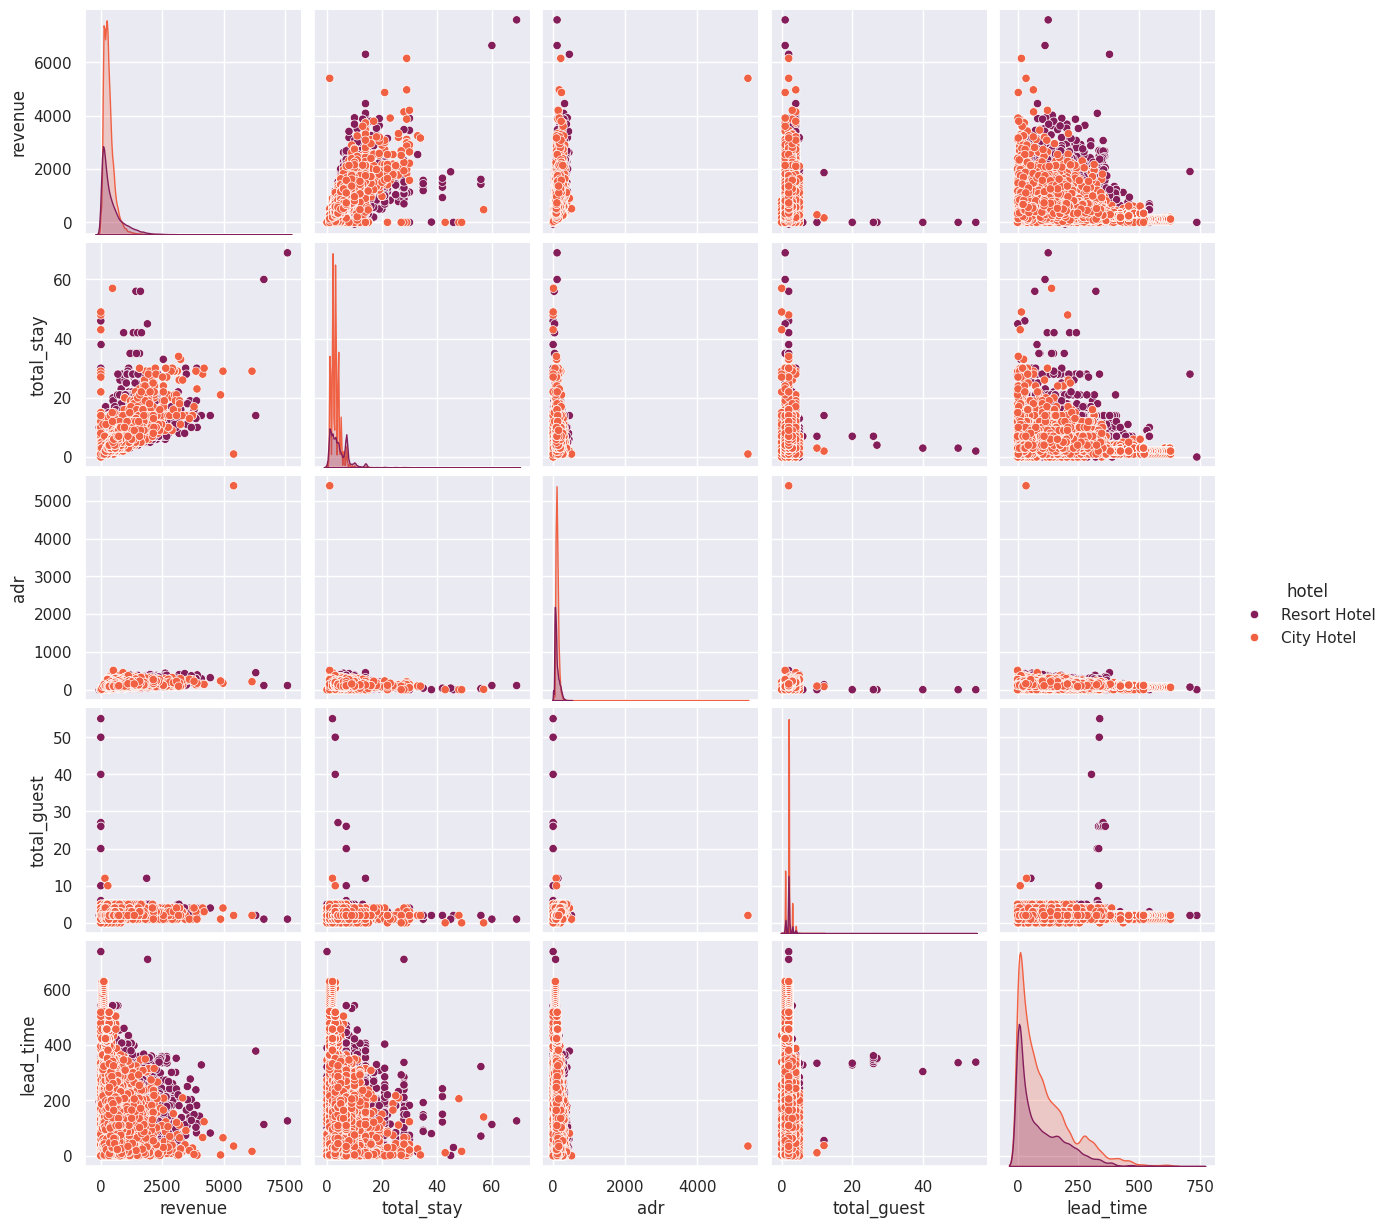

In [172]:
plt.figure(figsize=(12,8))  # Set the figure size before calling pairplot
sns.pairplot(df, vars=['revenue', 'total_stay', 'adr', 'total_guest', 'lead_time'], hue='hotel', palette='rocket')
plt.show()


##### 1. Why did you pick the specific chart?

*Answer* To understand the relationship among various variables (columns) present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer we can clearly see a positive correlation beween revenue and total stay,it means more number of days customer stays in hotel more revenue it generates and here we can also interprete that city hotel generates high revenue, and also has a more lead time as compared to Resort hotel,it means guests mostly prebook for the City hotel.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.


Answer
* As the peak season is from May to August, with August as the highest booked month, management should consider to utilise staff effectively.
* Increase room types A, H in order to increase adr and maximise profits
* As majority of the customers are from Portugal and western Europe, management should plan marketing activities in those regions respectively.
* Most preferred stay in hotels is 1 to 4 days, hotel management should introduce loyalty service, offers, tourism package in order to increase the stay of customers and to generate more revenue.
* As 30% of bookings from TA/To are cancelled, management should significantly take stpes to increase direct bookings by offering discounts, loyalty service, coupons on direct bookings in order to reduce cancellation and increase revenue.

* As the City Hotel has more bookings, it generates more revenue and it has more cancellations as well. Management may consider to provide customers with hourly booking option as most of the customers prefer short stay at City Hotel..

# **Conclusion**


* Bread & Breakfast (BB) is the most preferred meal by the customers.
* Most of the bookings are for City Hotel (61%) comparedto Resort Hotel (39%)
* City Hotel is making more revenue than the Resort Hotel

* Most of the guest stays for 1-4 days in the hotels.

* Most preferred distribution channel by customers is Travel Agent / Tour Oprator (TA/TO) to make hotel booking. also Travel Agent / Tour Operator (TA/TO) has the highest booking cancellation percentage

* Room Type A is the most preferred room type among travellers, while booking, whereas room types H,G,C are generating more adr respectively.

* The length of the stay decreases as ADR increases probably to reduce the cost.

* Most number of bookings are made from Portugal & Great Britain.
* Most number of bookings are made in July and August as compared rest of the months.
* City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.
* Resort hotel has slightly higher revisit percentage than City Hotel.
* Lead time, number of days in waiting list or assignation of reserved room to customer does not affect cancellation of bookings.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***